<a href="https://colab.research.google.com/github/tuhin107494/Compiler-Lab/blob/main/Parkinson's_Disease_Detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [66]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
warnings.filterwarnings('ignore')

Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('/content/parkinsons.csv')

In [3]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00218,0.00008,0.00465,0.00621,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458326,0.819521,-4.075192,0.335260,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342226,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434219,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01216,0.06425,...,0.10470,0.01767,19.649,1,0.417321,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(1156, 24)

In [5]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1156 non-null   object 
 1   MDVP:Fo(Hz)       1156 non-null   float64
 2   MDVP:Fhi(Hz)      1156 non-null   float64
 3   MDVP:Flo(Hz)      1156 non-null   float64
 4   MDVP:Jitter(%)    1156 non-null   float64
 5   MDVP:Jitter(Abs)  1156 non-null   float64
 6   MDVP:RAP          1156 non-null   float64
 7   MDVP:PPQ          1156 non-null   float64
 8   Jitter:DDP        1156 non-null   float64
 9   MDVP:Shimmer      1156 non-null   float64
 10  MDVP:Shimmer(dB)  1156 non-null   float64
 11  Shimmer:APQ3      1156 non-null   float64
 12  Shimmer:APQ5      1156 non-null   float64
 13  MDVP:APQ          1156 non-null   float64
 14  Shimmer:DDA       1156 non-null   float64
 15  NHR               1156 non-null   float64
 16  HNR               1156 non-null   float64


In [6]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.00000,...,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000
mean,153.599770,195.176294,115.014984,0.006049,0.000044,0.003292,0.003369,0.009590,0.029440,0.28158,...,0.046192,0.024532,22.432460,0.765571,0.474629,0.711067,-5.653711,0.227213,2.368868,0.206649
std,43.756903,84.436705,45.445290,0.004828,0.000035,0.003082,0.002703,0.008408,0.018674,0.19275,...,0.030127,0.040906,4.743781,0.423825,0.119088,0.057617,1.086106,0.084345,0.381148,0.092770
min,21.106000,102.145000,21.206000,0.001540,0.000007,0.000680,0.000210,0.002040,0.009540,0.07900,...,0.011640,0.000650,8.441000,0.000000,0.211610,0.571282,-7.777685,0.006271,1.281281,0.021141
25%,117.226000,131.897000,83.035500,0.003310,0.000020,0.001623,0.001840,0.004760,0.016130,0.14800,...,0.025180,0.005610,19.147000,1.000000,0.397937,0.667654,-6.440827,0.170183,2.095237,0.133867
50%,146.317500,172.860000,104.437000,0.004720,0.000030,0.002520,0.002710,0.007150,0.024345,0.22700,...,0.037240,0.011515,23.257500,1.000000,0.467160,0.719576,-5.682272,0.227454,2.344341,0.193918
75%,182.018000,233.099000,138.990000,0.007040,0.000060,0.003790,0.003890,0.011595,0.037160,0.35000,...,0.054900,0.025290,25.978750,1.000000,0.576684,0.754167,-5.058088,0.279689,2.592776,0.268144
max,277.116000,588.518000,279.683000,0.033160,0.000260,0.027440,0.019580,0.064330,0.119080,1.30200,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.827364,-2.434031,0.450493,3.671155,0.527367


In [8]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

1    885
0    271
Name: status, dtype: int64

1  --> Parkinson's Positive

0 --> Healthy


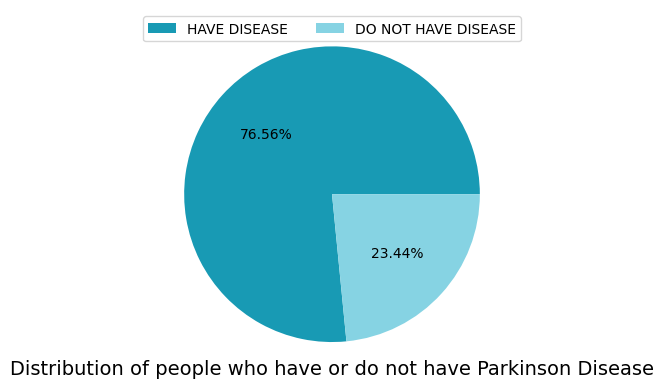

In [9]:

labels = ['HAVE DISEASE', 'DO NOT HAVE DISEASE']
colors = ['#189AB4', '#86D3E3']
plt.pie(parkinsons_data['status'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of people who have or do not have Parkinson Disease', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

In [10]:
# grouping the data bas3ed on the target variable
parkinsons_data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,183.012059,218.659605,143.274170,0.003635,0.000023,0.001859,0.001939,0.005583,0.017565,0.163760,...,0.013244,0.028003,0.010517,25.118225,0.428000,0.689547,-6.711232,0.159552,2.147676,0.120283
1,144.593295,187.985359,106.361606,0.006789,0.000050,0.003732,0.003807,0.010816,0.033076,0.317658,...,0.027214,0.051762,0.028824,21.610040,0.488908,0.717657,-5.329882,0.247931,2.436600,0.233095


Data Pre-Processing

Separating the features & Target

In [11]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [12]:
print(X)

      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0         119.992       157.302        74.997         0.00784   
1         122.400       148.650       113.819         0.00218   
2         116.682       131.111       111.555         0.01050   
3         116.676       137.871       111.366         0.00997   
4         116.014       141.781       110.655         0.01284   
...           ...           ...           ...             ...   
1151      145.462       161.068       141.998         0.00397   
1152      149.818       163.415       144.686         0.00336   
1153      115.226       123.925       106.627         0.00415   
1154      116.845       277.552        99.503         0.00531   
1155      117.845       277.552        99.503         0.00531   

      MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0              0.00007   0.00370   0.00554     0.01109       0.04374   
1              0.00008   0.00465   0.00621     0.01394       0.06134   
2  

In [13]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
1151    1
1152    1
1153    0
1154    0
1155    1
Name: status, Length: 1156, dtype: int64


Splitting the data to training data & Test data

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(1156, 22) (924, 22) (232, 22)


Data Standardization

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(X_train)

StandardScaler()

In [18]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [19]:
print(X_train)

[[ 1.09883036  0.42646532 -0.6375734  ... -0.16874755  0.2863219
  -0.18215446]
 [ 2.21853651  0.78151993  1.49270384 ... -0.31876967 -0.8765472
  -1.29715781]
 [ 1.25017674  0.68146114 -0.56566158 ... -1.17911287  0.84802786
  -0.40092039]
 ...
 [-0.09904098 -0.41692128  0.40877009 ...  0.51556008 -0.96656333
  -1.00959093]
 [-0.09904098 -0.41692128  0.40877009 ...  0.51556008 -0.96656333
  -1.00959093]
 [-0.85541207 -0.75642173 -0.11672068 ...  0.06827057  0.21267831
  -0.22612058]]


Model Training

In [85]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred_y=lr.predict(X_test)
accuracy = accuracy_score(Y_test, pred_y)
precision = precision_score(Y_test, pred_y)
f1 = f1_score(Y_test, pred_y)
recall = recall_score(Y_test, pred_y)
acc_lr = round(accuracy * 100, 2)
pre_lr = round(precision * 100, 2)
recall_lr = round(recall* 100, 2)
f1_lr = round(f1* 100, 2)
print(f'accuracy: {accuracy* 100:.2f}%')
print(f'accuracy: {precision* 100:.2f}%')
print(f'accuracy: {recall* 100:.2f}%')
print(f'accuracy: {f1* 100:.2f}%')

accuracy: 89.22%
accuracy: 92.55%
accuracy: 94.05%
accuracy: 93.30%


In [84]:
#SVM
svm =SVC()
svm.fit(X_train, Y_train)
pred_y= svm.predict(X_test)
accuracy = accuracy_score(Y_test, pred_y)
precision = precision_score(Y_test, pred_y)
f1 = f1_score(Y_test, pred_y)
recall = recall_score(Y_test, pred_y)
acc_svm = round(accuracy * 100, 2)
pre_svm= round(precision * 100, 2)
recall_svm = round(recall* 100, 2)
f1_svm= round(f1* 100, 2)
print(f'accuracy: {accuracy* 100:.2f}%')
print(f'precision: {precision* 100:.2f}%')
print(f'recall: {recall* 100:.2f}%')
print(f'f1: {f1* 100:.2f}%')

accuracy: 94.83%
precision: 94.36%
recall: 99.46%
f1: 96.84%


In [86]:
#K-nearest neighbours (KNN)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
pred_y = knn.predict(X_test)
accuracy = accuracy_score(Y_test, pred_y)
precision = precision_score(Y_test, pred_y)
f1 = f1_score(Y_test, pred_y)
recall = recall_score(Y_test, pred_y)
acc_knn = round(accuracy * 100, 2)
pre_knn= round(precision * 100, 2)
recall_knn = round(recall* 100, 2)
f1_knn= round(f1* 100, 2)
print(f'accuracy: {accuracy* 100:.2f}%')
print(f'precision: {precision* 100:.2f}%')
print(f'recall: {recall* 100:.2f}%')
print(f'f1: {f1* 100:.2f}%')

accuracy: 97.84%
precision: 98.39%
recall: 98.92%
f1: 98.65%


In [87]:
#Gaussian naive bayes
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
pred_y = gnb.predict(X_test)
accuracy = accuracy_score(Y_test, pred_y)
precision = precision_score(Y_test, pred_y)
f1 = f1_score(Y_test, pred_y)
recall = recall_score(Y_test, pred_y)
acc_gnb = round(accuracy * 100, 2)
pre_gnb= round(precision * 100, 2)
recall_gnb = round(recall* 100, 2)
f1_gnb = round(f1* 100, 2)
print(f'accuracy: {accuracy* 100:.2f}%')
print(f'precision: {precision* 100:.2f}%')
print(f'recall: {recall* 100:.2f}%')
print(f'f1: {f1* 100:.2f}%')

accuracy: 72.41%
precision: 99.19%
recall: 65.95%
f1: 79.22%


In [88]:
#Perceptron
percep = Perceptron()
percep.fit(X_train, Y_train)
pred_y = percep.predict(X_test)
accuracy = accuracy_score(Y_test, pred_y)
precision = precision_score(Y_test, pred_y)
f1 = f1_score(Y_test, pred_y)
recall = recall_score(Y_test, pred_y)
acc_percep = round(accuracy * 100, 2)
pre_percep= round(precision * 100, 2)
recall_percep = round(recall* 100, 2)
f1_percep = round(f1* 100, 2)
print(f'accuracy: {accuracy* 100:.2f}%')
print(f'precision: {precision* 100:.2f}%')
print(f'recall: {recall* 100:.2f}%')
print(f'f1: {f1* 100:.2f}%')

accuracy: 81.47%
precision: 94.38%
recall: 81.62%
f1: 87.54%


In [100]:
#Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
pred_y = linear_svc.predict(X_test)
accuracy = accuracy_score(Y_test, pred_y)
precision = precision_score(Y_test, pred_y)
f1 = f1_score(Y_test, pred_y)
recall = recall_score(Y_test, pred_y)
acc_lsvc = round(accuracy * 100, 2)
pre_lsvc= round(precision * 100, 2)
recall_lsvc = round(recall* 100, 2)
f1_lsvc = round(f1* 100, 2)
print(f'accuracy: {accuracy* 100:.2f}%')
print(f'precision: {precision* 100:.2f}%')
print(f'recall: {recall* 100:.2f}%')
print(f'f1: {f1* 100:.2f}%')

accuracy: 88.36%
precision: 93.41%
recall: 91.89%
f1: 92.64%


In [94]:
#Decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
pred_y = decision_tree.predict(X_test)
accuracy = accuracy_score(Y_test, pred_y)
precision = precision_score(Y_test, pred_y)
f1 = f1_score(Y_test, pred_y)
recall = recall_score(Y_test, pred_y)
acc_dt = round(accuracy * 100, 2)
pre_dt= round(precision * 100, 2)
recall_dt = round(recall* 100, 2)
f1_dt = round(f1* 100, 2)
print(f'accuracy: {accuracy* 100:.2f}%')
print(f'precision: {precision* 100:.2f}%')
print(f'recall: {recall* 100:.2f}%')
print(f'f1: {f1* 100:.2f}%')

accuracy: 98.28%
precision: 100.00%
recall: 97.84%
f1: 98.91%


In [93]:
#Random forest

random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
pred_y = random_forest.predict(X_test)
accuracy = accuracy_score(Y_test, pred_y)
precision = precision_score(Y_test, pred_y)
f1 = f1_score(Y_test, pred_y)
recall = recall_score(Y_test, pred_y)
acc_rf = round(accuracy * 100, 2)
pre_rf= round(precision * 100, 2)
recall_rf = round(recall* 100, 2)
f1_rf = round(f1* 100, 2)
print(f'accuracy: {accuracy* 100:.2f}%')
print(f'precision: {precision* 100:.2f}%')
print(f'recall: {recall* 100:.2f}%')
print(f'f1: {f1* 100:.2f}%')

accuracy: 99.14%
precision: 100.00%
recall: 98.92%
f1: 99.46%


In [92]:
#Stochastic gradient descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
pred_y = sgd.predict(X_test)
accuracy = accuracy_score(Y_test, pred_y)
precision = precision_score(Y_test, pred_y)
f1 = f1_score(Y_test, pred_y)
recall = recall_score(Y_test, pred_y)
acc_sgd = round(accuracy * 100, 2)
pre_sgd= round(precision * 100, 2)
recall_sgd = round(recall* 100, 2)
f1_sgd = round(f1* 100, 2)
print(f'accuracy: {accuracy* 100:.2f}%')
print(f'precision: {precision* 100:.2f}%')
print(f'recall: {recall* 100:.2f}%')
print(f'f1: {f1* 100:.2f}%')

accuracy: 90.09%
precision: 94.51%
recall: 92.97%
f1: 93.73%


Model Evaluation

Accuracy Comparision


In [112]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent',
                                 'Linear SVC', 'Decision Tree'],
                       'Score': [acc_svm, acc_knn, acc_lr, acc_rf, acc_gnb, acc_percep,
                                 acc_sgd, acc_lsvc, acc_dt]})

models.sort_values(by = 'Score', ascending = True, ignore_index = True)

,Model,Score
0,Naive Bayes,72.41
1,Perceptron,81.47
2,Linear SVC,88.36
3,Logistic Regression,89.22
4,Stochastic Gradient Decent,90.09
5,Support Vector Machines,94.83
6,KNN,97.84
7,Decision Tree,98.28
8,Random Forest,99.14


Precision Comparision

In [113]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent',
                                 'Linear SVC', 'Decision Tree'],
                       'Score': [pre_svm, pre_knn, pre_lr, pre_rf, pre_gnb, pre_percep,
                                 pre_sgd, pre_lsvc,pre_dt]})

models.sort_values(by = 'Score', ascending = True, ignore_index = True)

,Model,Score
0,Logistic Regression,92.55
1,Linear SVC,93.41
2,Support Vector Machines,94.36
3,Perceptron,94.38
4,Stochastic Gradient Decent,94.51
5,KNN,98.39
6,Naive Bayes,99.19
7,Random Forest,100.00
8,Decision Tree,100.00


Recall Comparision

In [114]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent',
                                 'Linear SVC', 'Decision Tree'],
                       'Score': [recall_svm, recall_knn, recall_lr, recall_rf, recall_gnb, recall_percep,
                                 recall_sgd, recall_lsvc,recall_dt]})

models.sort_values(by = 'Score', ascending = True, ignore_index = True)

,Model,Score
0,Naive Bayes,65.95
1,Perceptron,81.62
2,Linear SVC,91.89
3,Stochastic Gradient Decent,92.97
4,Logistic Regression,94.05
5,Decision Tree,97.84
6,KNN,98.92
7,Random Forest,98.92
8,Support Vector Machines,99.46


In [115]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent',
                                 'Linear SVC', 'Decision Tree'],
                       'Score': [f1_svm, f1_knn, f1_lr, f1_rf, f1_gnb, f1_percep,
                                 f1_sgd, f1_lsvc,f1_dt]})

models.sort_values(by = 'Score', ascending = True, ignore_index = True)

,Model,Score
0,Naive Bayes,79.22
1,Perceptron,87.54
2,Linear SVC,92.64
3,Logistic Regression,93.30
4,Stochastic Gradient Decent,93.73
5,Support Vector Machines,96.84
6,KNN,98.65
7,Decision Tree,98.91
8,Random Forest,99.46



**K fold Cross Validaton**

In [30]:

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
len(classifiers)


9

In [31]:
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 9))

**Classifier cross validation**

In [32]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())


In [33]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.987023,0.006489,Random Forest
1,0.981619,0.010684,Decision Tree
2,0.976193,0.012204,KNN
3,0.922119,0.016983,Support Vector Machines
4,0.878768,0.024474,Linear SVC
5,0.862565,0.024487,Logistic Regression
6,0.828014,0.035407,Stochastic Gradient Descent
7,0.808438,0.033980,Perceptron
8,0.705660,0.052384,Gausian Naive Bayes


In [34]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers

max_features = ['auto', 'log2']

max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]

max_depth.append(None)

bootstrap = [True, False]

r_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'bootstrap': bootstrap}

print(r_grid)

{'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15], 'max_features': ['auto', 'log2'], 'max_depth': [5, 10, None], 'bootstrap': [True, False]}


In [35]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = 1)

In [36]:
rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=r_grid, n_iter = 20, scoring='neg_mean_absolute_error', cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

rfr_random.fit(X_train, Y_train);

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [37]:
print(rfr_random.best_params_)

{'n_estimators': 9, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}


In [ ]:
#Random forest
random_forest = RandomForestClassifier(n_estimators= 12, max_features= 'auto' , max_depth= None, bootstrap=False)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [ ]:
cross_val_score(random_forest, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.9859513791491352

In [ ]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        47
           1       0.99      0.99      0.99       185

    accuracy                           0.99       232
   macro avg       0.98      0.98      0.98       232
weighted avg       0.99      0.99      0.99       232



Building a Predictive System

In [ ]:
input_data = (119.992 ,157.302 ,74.997 , 0.00784, 0.00007 ,0.0037,  0.00554, 0.01109, 0.04374, 0.426 ,  0.02182 ,0.0313,  0.02971, 0.06545 ,0.02211 ,21.033,  0.414783 ,   0.815285 ,   -4.813031 ,  0.266482 ,   2.301442 ,   0.284654)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[1]
The Person has Parkinsons
